In [4]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [25]:
# Now we need to read in the data
df = pd.read_csv("/Users/bididudy/Downloads/SQL/movies.csv")

In [6]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


# Data Cleaning

### Dealing with missing values

In [14]:
# Check for missing values in the entire DataFrame
missing_values = df.isna().sum()
missing_values


name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [ ]:
# you can see there are big number of missing values in budget and gross table. we drop them.

In [15]:
df.dropna(subset = ['budget', 'gross'], inplace=True)
missing_values = df.isna().sum()
missing_values

name         0
rating      12
genre        0
year         0
released     0
score        0
votes        0
director     0
writer       0
star         0
country      1
budget       0
gross        0
company      2
runtime      1
dtype: int64

In [16]:
# now there are very few missing values in rating, country, company and runtime columns which are not harmful for analysis.

In [18]:
df.describe()

,year,score,votes,budget,gross,runtime
count,5436.000000,5436.000000,5.436000e+03,5.436000e+03,5.436000e+03,5435.000000
mean,2001.651582,6.392642,1.149110e+05,3.593864e+07,1.030045e+08,108.156394
std,10.541791,0.963200,1.842255e+05,4.154770e+07,1.871051e+08,18.121401
min,1980.000000,1.900000,1.950000e+02,6.000000e+03,3.090000e+02,63.000000
25%,1993.000000,5.800000,1.900000e+04,1.000000e+07,1.067412e+07,95.000000
50%,2002.000000,6.500000,5.200000e+04,2.100000e+07,3.671199e+07,105.000000
75%,2011.000000,7.100000,1.290000e+05,4.500000e+07,1.119478e+08,118.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,271.000000


In [27]:
# Checking for duplicate rows in the entire DataFrame
duplicates = df.duplicated()

# Counting the number of duplicate rows
num_duplicates = duplicates.sum()
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 0


In [28]:
# as there are no duplicates in dataset we don't have to deal with it

<AxesSubplot:>

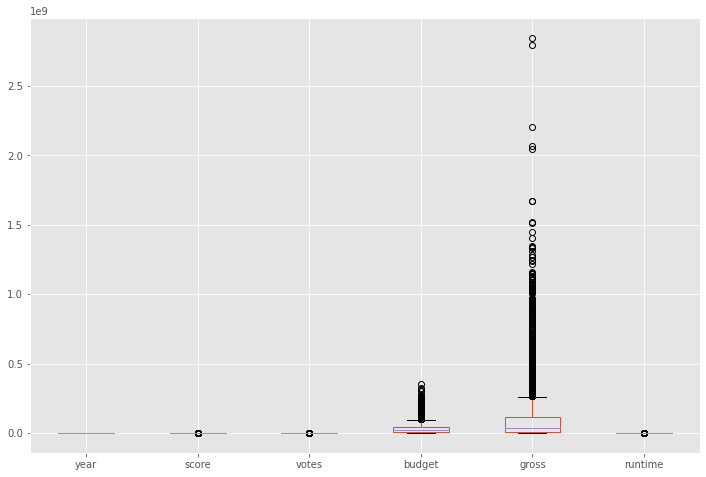

In [21]:
# to check outliers in column
df.boxplot()

In [23]:
# we can see there are outliers but in budget and gross column more number of outliers are present.

### Data cleaning

In [32]:
# we can see there are two year columns, one is date and another is realeased year.
# we need to get 1 year column so it can be used in analysis.
# we take release year and use it as year colum.
# for that we need to take 4 digits of of year from released column and create the required column
df['movie_year']=df['released'].astype(str).str.extract(r'(\d{4})')

In [68]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,movie_year
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000.0,2.847246e+09,2253,162.0,29
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000.0,2.797501e+09,1606,181.0,39
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000.0,2.201647e+09,2253,194.0,17
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000.0,2.069522e+09,1540,138.0,35
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000.0,2.048360e+09,1606,149.0,38


### Data sorting

In [38]:
# as we are going to check correlation in the data, gross column is one of the main aspects of data.
# we are going to sort data by gross value and see it.
df=df.sort_values(by='gross', inplace=False, ascending=False)

In [35]:
# I can see that we can't see all the rows. wee need to see all the rows.
# as bydefault the option is off. We need to set it
pd.set_option('display.max_rows', None)

In [69]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,movie_year
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000.0,2.847246e+09,2253,162.0,29
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000.0,2.797501e+09,1606,181.0,39
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000.0,2.201647e+09,2253,194.0,17
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000.0,2.069522e+09,1540,138.0,35
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000.0,2.048360e+09,1606,149.0,38


### Data analysis

#### Here we need to find out which factors are highly correlated to gross earnings. To do that we need to convert all the object types to category type so we can run correlation on all factors. Then run correlation test and scatter plot on highest pairs.

In [70]:
df1 = df # we will create copy of main dataset so main dataset will be intact

for col_name in df1:
    if(df1[col_name].dtype == 'object'): # wherever data type is object we will convert to category
        df1[col_name] = df1[col_name].astype('category')
        df1[col_name] = df1[col_name].cat.codes
df1.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,movie_year
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000.0,2.847246e+09,2253,162.0,29
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000.0,2.797501e+09,1606,181.0,39
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000.0,2.201647e+09,2253,194.0,17
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000.0,2.069522e+09,1540,138.0,35
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000.0,2.048360e+09,1606,149.0,38


In [50]:
# fisrt we check the correlation between the numeric columns 
# to check correlation there are three methods: Pearson, Kendall and Spearman
# The method we are using to find the correlations between variables is the Pearson method:

In [64]:
corr_matrix=df1.corr(method='pearson')
corr_matrix

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,movie_year
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.023970,0.005533,0.009211,0.010392,0.010225
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.176002,-0.107339,-0.032943,0.062145,0.006403
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.356564,-0.235650,-0.071067,-0.052711,-0.078210
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.329321,0.257486,-0.010431,0.120811,0.996397
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.014683,0.001659,-0.010474,0.000868,-0.003775
score,0.017097,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.076254,0.186258,0.001030,0.399451,0.106295
votes,0.013088,0.033225,-0.145307,0.222945,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.442429,0.630757,0.133204,0.309212,0.218289
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,-0.012272,-0.014441,0.004404,0.017624,-0.020385
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.039451,-0.023519,0.005646,-0.003511,-0.008391
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019589,-0.002717,0.012442,0.010174,-0.027606


<AxesSubplot:>

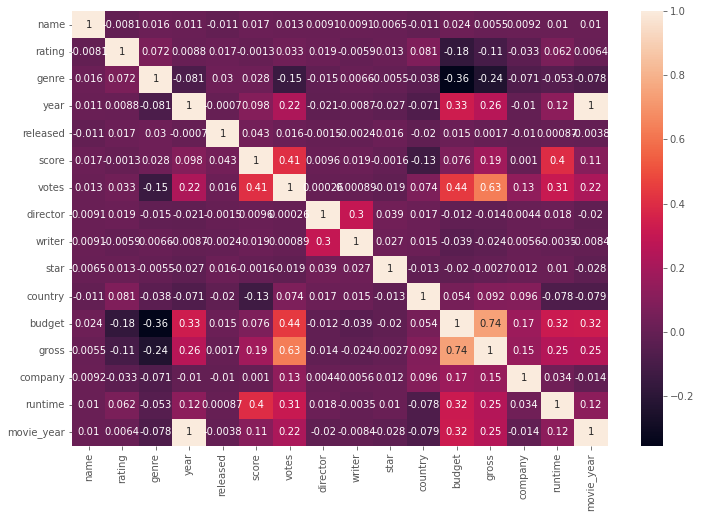

In [65]:
# we plot heatmap on corr_matrix dataset
sns.heatmap(corr_matrix, annot=True)

In [56]:
# from heatmap we can see see that brighter the color more the correlation.

In [66]:
# going further one step we can obtain only the highest correlations by doing the following:
corr_pairs = corr_matrix.unstack() #we can separate each values of dataset

sorted_pairs = corr_pairs.sort_values() # sort values of whole corr_matrix

high_corr = sorted_pairs[(sorted_pairs > 0.5) & (sorted_pairs < 1)] # giving condition to check higher correlation

high_corr

votes       gross         0.630757
gross       votes         0.630757
            budget        0.740395
budget      gross         0.740395
movie_year  year          0.996397
year        movie_year    0.996397
dtype: float64

In [ ]:
# we. can see that votes and budget has higher correlation with gross values

Text(0, 0.5, 'Movie Gross Earnings')

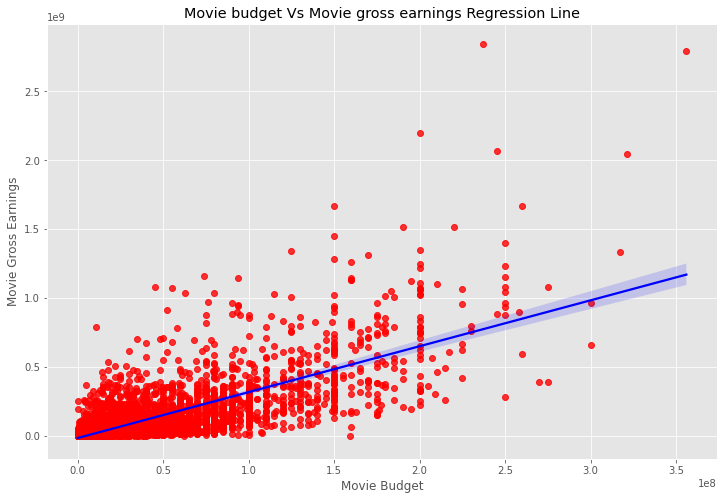

In [59]:
# Correlation between 'budget' and 'gross' earnings
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})
plt.title('Movie budget Vs Movie gross earnings Regression Line')

plt.xlabel('Movie Budget')

plt.ylabel('Movie Gross Earnings' )

#### The regression line is a straight line that summarizes the overall trend or relationship between 'budget' and 'gross' earnings. It has a positive slope, so it means there is a positive correlation. In this case, as movie budgets increase, gross earnings tend to increase as well.

Text(0, 0.5, 'Movie Gross Earnings')

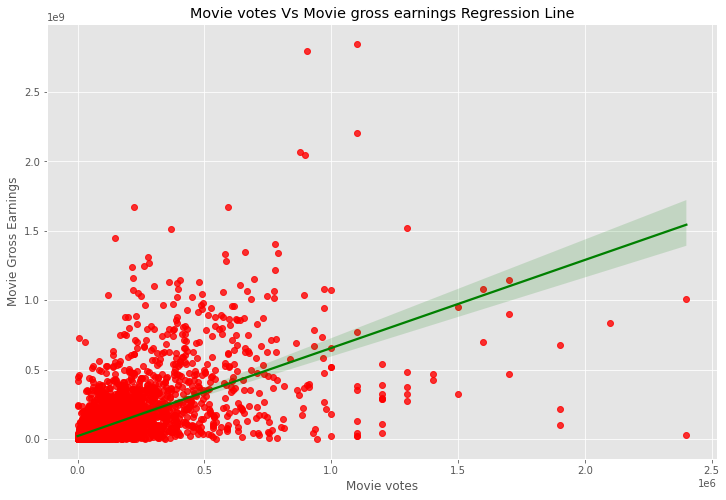

In [61]:
# Correlation between 'votes' and 'gross' earnings
sns.regplot(x='votes', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"green"})
plt.title('Movie votes Vs Movie gross earnings Regression Line')

plt.xlabel('Movie votes')

plt.ylabel('Movie Gross Earnings' )

#### The regression line is a straight line that summarizes the overall trend or relationship between 'votes' and 'gross' earnings. It also has a positive slope, and a positive correlation. In this case, as the number of votes (audience ratings) increases, gross earnings tend to increase. This implies that movies with higher audience ratings tend to perform better at the box office.